In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/df_dataset_unidos5.csv')
df = df.dropna()  # O aplicar imputación si es razonable
#df = df.drop(columns=['precipitacion'])
#df = df.drop(columns=['temperatura'])

df_by_empresa = df[df['IdEmpresa'] == 26]
# df = df_by_empresa

In [4]:
df.describe()

,IdEmpresa,Año,IdMes,Energía Facturada (MWh),temperatura,precipitacion,PIB_mensual_interpolado,COSTO_CANASTA,INGRESO_FAMILIAR_MENSUAL
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2.489000e+03,2489.000000,2489.000000
mean,105.842105,2013.992366,6.541985,77916.301410,20.737184,125.105517,2.393619e+07,630.941985,601.465954
std,68.155390,3.173750,3.432155,100627.981308,5.137127,130.353857,2.727513e+06,69.021568,108.852899
min,11.000000,2009.000000,1.000000,3953.979000,10.070000,0.000000,1.878097e+07,512.030000,406.930000
25%,30.000000,2011.000000,4.000000,26300.669000,15.520000,26.350000,2.172856e+07,567.410000,492.800000
50%,130.000000,2014.000000,7.000000,41631.829000,22.230000,83.260000,2.485566e+07,634.670000,634.670000
75%,178.000000,2017.000000,10.000000,75352.006220,25.500000,179.710000,2.644544e+07,707.470000,700.000000
max,193.000000,2019.000000,12.000000,464073.796303,28.500000,1578.700000,2.746185e+07,719.880000,735.470000


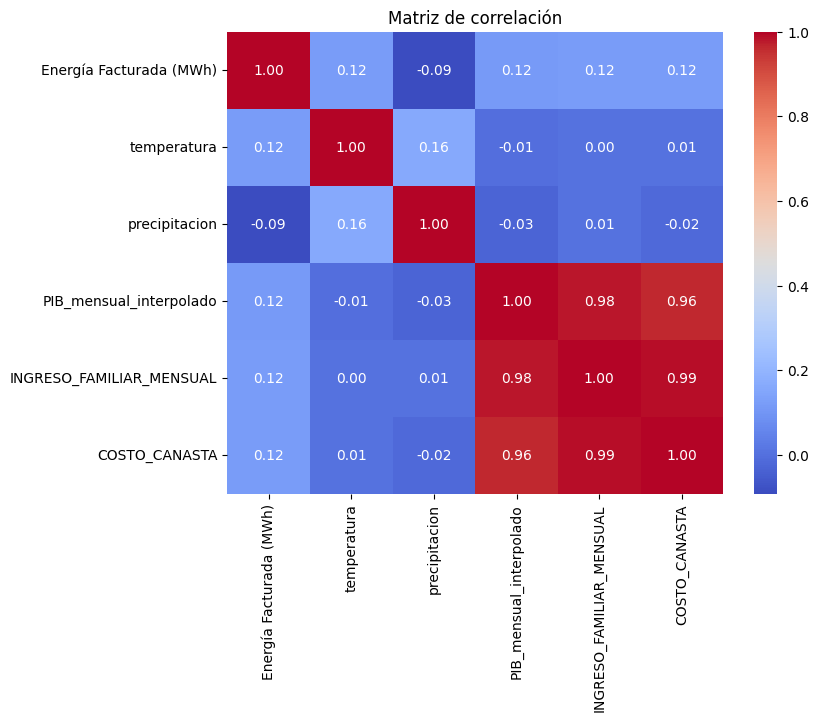

In [ ]:
# Selección de variables numéricas
df_corr = df[['Energía Facturada (MWh)', 'temperatura', 'precipitacion', 'PIB_mensual_interpolado','INGRESO_FAMILIAR_MENSUAL','COSTO_CANASTA']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


Matriz de correlacion empresa de la empresa que representa mayor consumo: CNEL Guayaquil

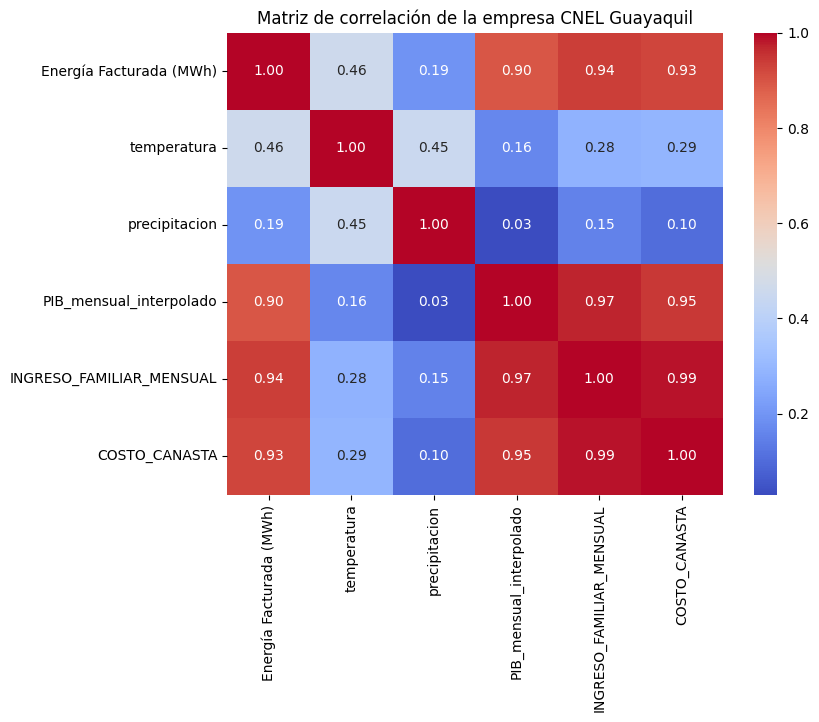

In [ ]:
df_corr = df_by_empresa[['Energía Facturada (MWh)', 'temperatura', 'precipitacion', 'PIB_mensual_interpolado','INGRESO_FAMILIAR_MENSUAL','COSTO_CANASTA']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de la empresa CNEL Guayaquil')
plt.show()

Se ve un gran cambio la correlacion en relacion al clima, cuando se hace la correlacion entre todas la empresas y solo con la empresa de mayor consumo, esto puede explicarque por la gran diferecia de climas que puede existir entre una region y otra en el pais.

In [ ]:
# Celda 1: Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Librerías de TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2

# Configurar reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

# Configurar visualización
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Librerías importadas correctamente
TensorFlow version: 2.18.0
Pandas version: 2.2.2
NumPy version: 2.0.2


In [5]:
# Celda 2: Cargar y explorar el dataset
# IMPORTANTE: Asegúrate de que el archivo esté en la ruta correcta
# df = pd.read_csv('tu_archivo.csv')  # Reemplaza con tu ruta

# Para este ejemplo, crearemos un dataset basado en tu muestra
# Cuando tengas tu archivo, simplemente usa pd.read_csv()

# Simulación basada en tu dataset real




# Análisis exploratorio
print("=== ANÁLISIS EXPLORATORIO DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"\nPrimeras 5 filas:")
print(df.head())

print(f"\nInformación del dataset:")
print(df.info())

print(f"\nEstadísticas descriptivas:")
print(df.describe())

print(f"\nEmpresas únicas: {sorted(df['IdEmpresa'].unique())}")
print(f"Años disponibles: {sorted(df['Año'].unique())}")
print(f"Total de empresas: {df['IdEmpresa'].nunique()}")
print(f"Registros por empresa: {df.groupby('IdEmpresa').size().describe()}")

# Verificar valores nulos
print(f"\nValores nulos por columna:")
print(df.isnull().sum())

# Análisis temporal
print(f"\nRango temporal:")
print(f"Desde: {df['Año'].min()}/{df['IdMes'].min()}")
print(f"Hasta: {df['Año'].max()}/{df['IdMes'].max()}")

# Crear columna de fecha para análisis temporal
df['Fecha'] =  pd.to_datetime({'year': df['Año'],
                                   'month': df['IdMes'],
                                   'day': 1})
print(f"Rango de fechas: {df['Fecha'].min()} a {df['Fecha'].max()}")

print("✅ Dataset cargado y explorado correctamente")

=== ANÁLISIS EXPLORATORIO DEL DATASET ===
Forma del dataset: (2489, 9)

Primeras 5 filas:
   IdEmpresa   Año  IdMes  Energía Facturada (MWh)  temperatura  \
0         11  2009      1             32904.522021        17.03   
1         11  2009      2             32088.890585        16.18   
2         11  2009      3             32373.116098        16.80   
3         11  2009      4             33725.857730        16.83   
4         11  2009      5             33032.727702        16.84   

   precipitacion  PIB_mensual_interpolado  COSTO_CANASTA  \
0         239.58              19048194.13         512.03   
1         178.15              19017244.53         513.27   
2         133.67              18989494.50         519.90   
3         221.99              18961052.71         522.76   
4         169.84              18936260.49         522.75   

   INGRESO_FAMILIAR_MENSUAL  
0                    406.93  
1                    406.93  
2                    406.93  
3                    406.9

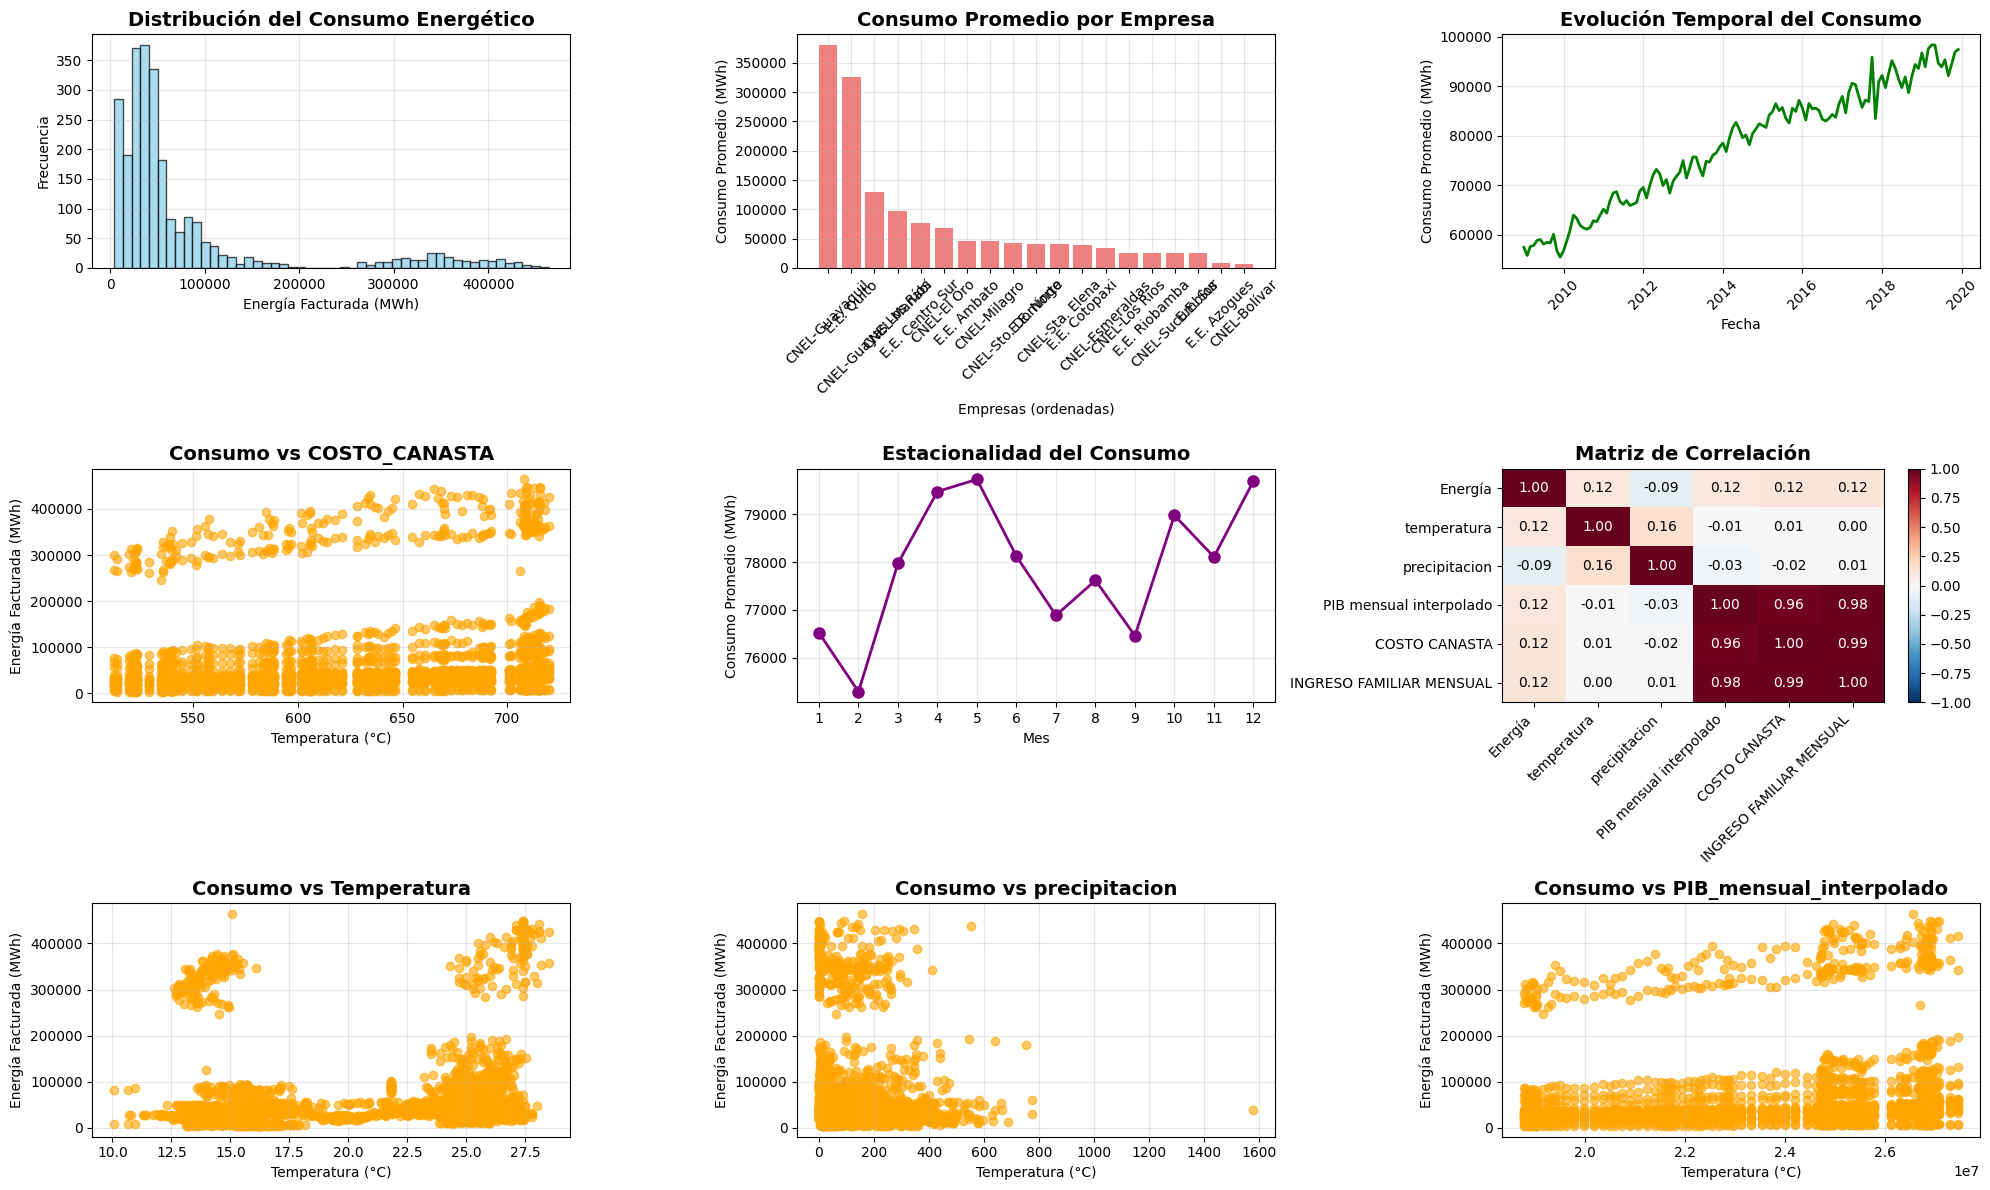

=== ESTADÍSTICAS POR EMPRESA ===
                      N_Registros   Promedio  Desv_Std     Mínimo     Máximo
NombreEmpresa                                                               
CNEL-Bolívar                  131    5978.24   1116.16    3953.98    7706.43
CNEL-El Oro                   131   67374.83  17059.45   37527.89  100733.22
CNEL-Esmeraldas               131   33382.94   5515.84   21697.36   47550.03
CNEL-Guayaquil                131  379884.82  43418.57  284663.20  448488.82
CNEL-Guayas Los Ríos          131  129862.03  32906.52   75352.01  197432.94
CNEL-Los Ríos                 131   25682.25   5695.81   14698.34   37603.47
CNEL-Manabí                   131   96660.12  18608.53   46673.39  131397.28
CNEL-Milagro                  131   45511.96   9434.89   30285.71   71415.88
CNEL-Sta. Elena               131   40582.12   9989.63   23260.01   66615.68
CNEL-Sto. Domingo             131   43151.96  10630.34   25817.45   61113.26
CNEL-Sucumbíos                131   25430.8

In [11]:
# Celda 3: Visualización exploratoria de los datos
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# 1. Distribución del consumo energético
axes[0, 0].hist(df['Energía Facturada (MWh)'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución del Consumo Energético', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Energía Facturada (MWh)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# 2. Consumo promedio por empresa

nombres_empresa = {
  11: "E.E. Ambato",
  17: "E.E. Azogues",
  20: "CNEL-Bolívar",
  26: "CNEL-Guayaquil",
  30: "E.E. Centro Sur",
  35: "E.E. Cotopaxi",
  54: "CNEL-El Oro",
  72: "CNEL-Esmeraldas",
  81: "E.E. Galápagos",
  87: "CNEL-Guayas Los Ríos",
  130: "CNEL-Los Ríos",
  134: "CNEL-Manabí",
  136: "CNEL-Milagro",
  142: "E.E. Norte",
  174: "E.E. Quito",
  178: "E.E. Riobamba",
  189: "CNEL-Sta. Elena",
  191: "CNEL-Sto. Domingo",
  192: "CNEL-Sucumbíos",
  193: "E.E. Sur"
}
consumo_empresa = df.copy()

consumo_empresa['NombreEmpresa'] = consumo_empresa['IdEmpresa'].map(nombres_empresa)


consumo_empresa = consumo_empresa.groupby('NombreEmpresa')['Energía Facturada (MWh)'].mean().sort_values(ascending=False)

axes[0, 1].bar(range(len(consumo_empresa)), consumo_empresa.values, color='lightcoral')
axes[0, 1].set_title('Consumo Promedio por Empresa', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Empresas (ordenadas)')
axes[0, 1].set_ylabel('Consumo Promedio (MWh)')
axes[0, 1].set_xticks(range(len(consumo_empresa)))
axes[0, 1].set_xticklabels(consumo_empresa.index, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Evolución temporal del consumo
consumo_temporal = df.groupby('Fecha')['Energía Facturada (MWh)'].mean()
axes[0, 2].plot(consumo_temporal.index, consumo_temporal.values, color='green', linewidth=2)
axes[0, 2].set_title('Evolución Temporal del Consumo', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Fecha')
axes[0, 2].set_ylabel('Consumo Promedio (MWh)')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# 4. Consumo vs Temperatura
axes[2, 0].scatter(df['temperatura'], df['Energía Facturada (MWh)'], alpha=0.6, color='orange')
axes[2, 0].set_title('Consumo vs Temperatura', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Temperatura (°C)')
axes[2, 0].set_ylabel('Energía Facturada (MWh)')
axes[2, 0].grid(True, alpha=0.3)
# 4. Consumo vs Temperatura
axes[2, 1].scatter(df['precipitacion'], df['Energía Facturada (MWh)'], alpha=0.6, color='orange')
axes[2, 1].set_title('Consumo vs precipitacion', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Temperatura (°C)')
axes[2, 1].set_ylabel('Energía Facturada (MWh)')
axes[2, 1].grid(True, alpha=0.3)

axes[2, 2].scatter(df['PIB_mensual_interpolado'], df['Energía Facturada (MWh)'], alpha=0.6, color='orange')
axes[2, 2].set_title('Consumo vs PIB_mensual_interpolado', fontsize=14, fontweight='bold')
axes[2, 2].set_xlabel('Temperatura (°C)')
axes[2, 2].set_ylabel('Energía Facturada (MWh)')
axes[2, 2].grid(True, alpha=0.3)

axes[1, 0].scatter(df['COSTO_CANASTA'], df['Energía Facturada (MWh)'], alpha=0.6, color='orange')
axes[1, 0].set_title('Consumo vs COSTO_CANASTA', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Temperatura (°C)')
axes[1, 0].set_ylabel('Energía Facturada (MWh)')
axes[1, 0].grid(True, alpha=0.3)

# axes[1, 0].scatter(df['INGRESO_FAMILIAR_MENSUAL'], df['Energía Facturada (MWh)'], alpha=0.6, color='orange')
# axes[1, 0].set_title('Consumo vs INGRESO_FAMILIAR_MENSUAL', fontsize=14, fontweight='bold')
# axes[1, 0].set_xlabel('Temperatura (°C)')
# axes[1, 0].set_ylabel('Energía Facturada (MWh)')
# axes[1, 0].grid(True, alpha=0.3)

# 5. Estacionalidad (consumo por mes)
consumo_mes = df.groupby('IdMes')['Energía Facturada (MWh)'].mean()
axes[1, 1].plot(consumo_mes.index, consumo_mes.values, 'o-', color='purple', linewidth=2, markersize=8)
axes[1, 1].set_title('Estacionalidad del Consumo', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Consumo Promedio (MWh)')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)

# 6. Matriz de correlación
variables_numericas = ['Energía Facturada (MWh)', 'temperatura', 'precipitacion',
                      'PIB_mensual_interpolado', 'COSTO_CANASTA', 'INGRESO_FAMILIAR_MENSUAL']
correlacion = df[variables_numericas].corr()
im = axes[1, 2].imshow(correlacion, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_title('Matriz de Correlación', fontsize=14, fontweight='bold')
axes[1, 2].set_xticks(range(len(variables_numericas)))
axes[1, 2].set_yticks(range(len(variables_numericas)))
axes[1, 2].set_xticklabels([v.replace('Energía Facturada (MWh)', 'Energía').replace('_', ' ')
                           for v in variables_numericas], rotation=45, ha='right')
axes[1, 2].set_yticklabels([v.replace('Energía Facturada (MWh)', 'Energía').replace('_', ' ')
                           for v in variables_numericas])

# Añadir valores de correlación
for i in range(len(variables_numericas)):
    for j in range(len(variables_numericas)):
        text = axes[1, 2].text(j, i, f'{correlacion.iloc[i, j]:.2f}',
                              ha="center", va="center", color="white" if abs(correlacion.iloc[i, j]) > 0.5 else "black")

plt.colorbar(im, ax=axes[1, 2])
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("=== ESTADÍSTICAS POR EMPRESA ===")

stats_empresa = df.copy()
stats_empresa['NombreEmpresa'] = stats_empresa['IdEmpresa'].map(nombres_empresa)

stats_empresa = stats_empresa.groupby('NombreEmpresa')['Energía Facturada (MWh)'].agg(['count', 'mean', 'std', 'min', 'max'])

stats_empresa.columns = ['N_Registros', 'Promedio', 'Desv_Std', 'Mínimo', 'Máximo']
print(stats_empresa.round(2))

print("✅ Análisis exploratorio completado")

In [7]:
stats_empresa.round(2)

,N_Registros,Promedio,Desv_Std,Mínimo,Máximo
NombreEmpresa,,,,,
CNEL-Bolívar,131,5978.24,1116.16,3953.98,7706.43
CNEL-El Oro,131,67374.83,17059.45,37527.89,100733.22
CNEL-Esmeraldas,131,33382.94,5515.84,21697.36,47550.03
CNEL-Guayaquil,131,379884.82,43418.57,284663.20,448488.82
CNEL-Guayas Los Ríos,131,129862.03,32906.52,75352.01,197432.94
CNEL-Los Ríos,131,25682.25,5695.81,14698.34,37603.47
CNEL-Manabí,131,96660.12,18608.53,46673.39,131397.28
CNEL-Milagro,131,45511.96,9434.89,30285.71,71415.88
CNEL-Sta. Elena,131,40582.12,9989.63,23260.01,66615.68


Iniciando Feature Engineering...
Creando lag features...
Creando rolling features...
Creando features estacionales...
Feature Engineering completado. Total features: 31
Entrenando modelo XGBoost...
Entrenamiento completado.
=== MÉTRICAS GENERALES (TEST SET) ===
MAE: 3761.28 MWh
RMSE: 10419.37 MWh
R²: 0.9907
MAPE: 2.95%
RMSLE: 0.0568
Guardando modelo en energy_predictor_model.joblib...
Modelo guardado exitosamente.


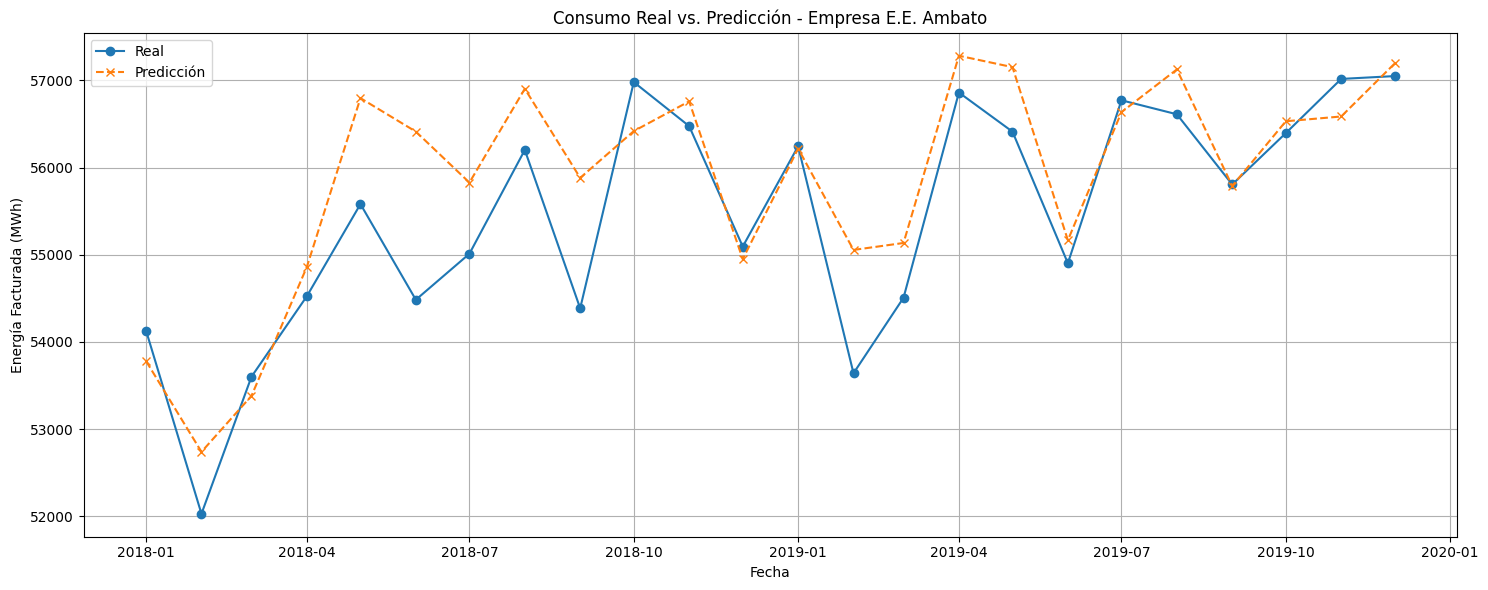

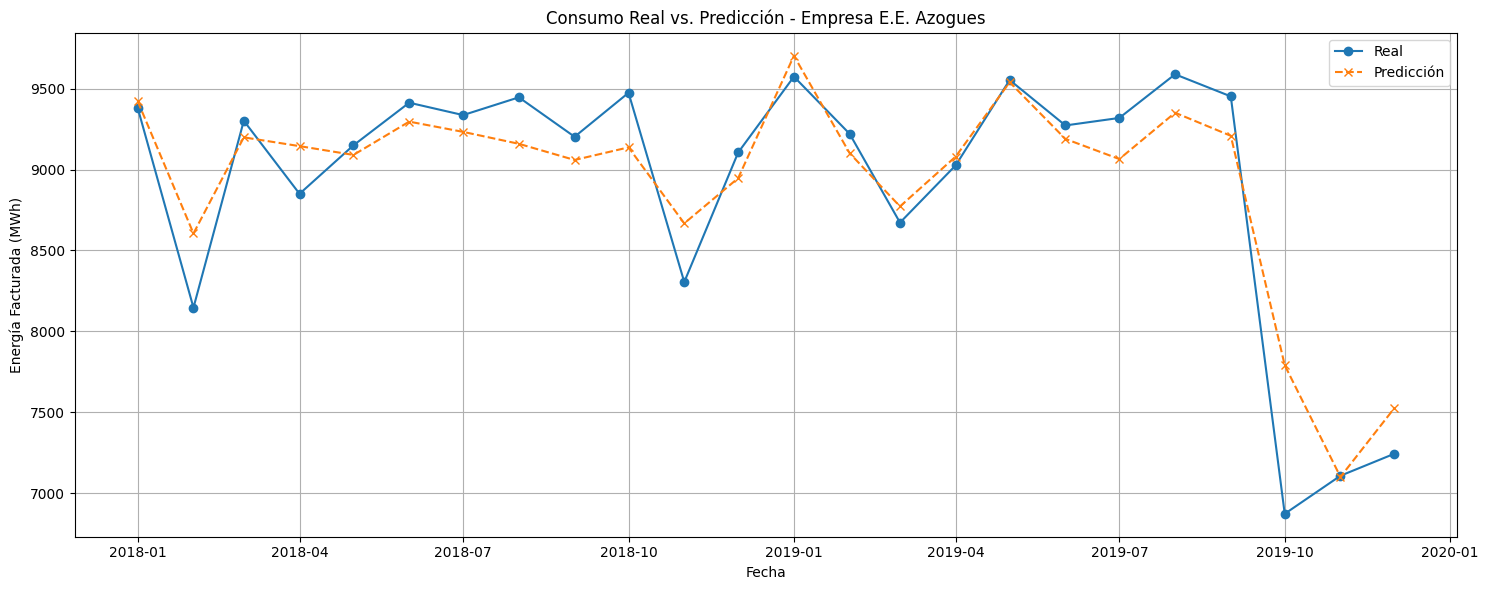

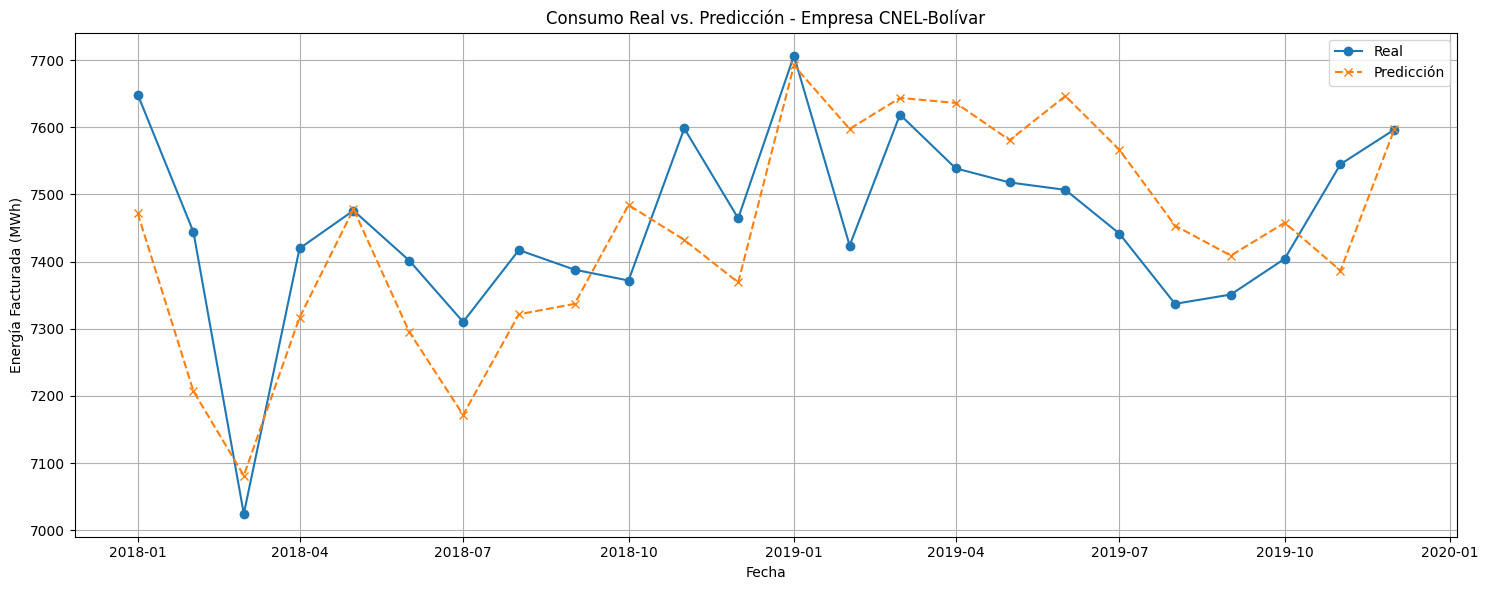

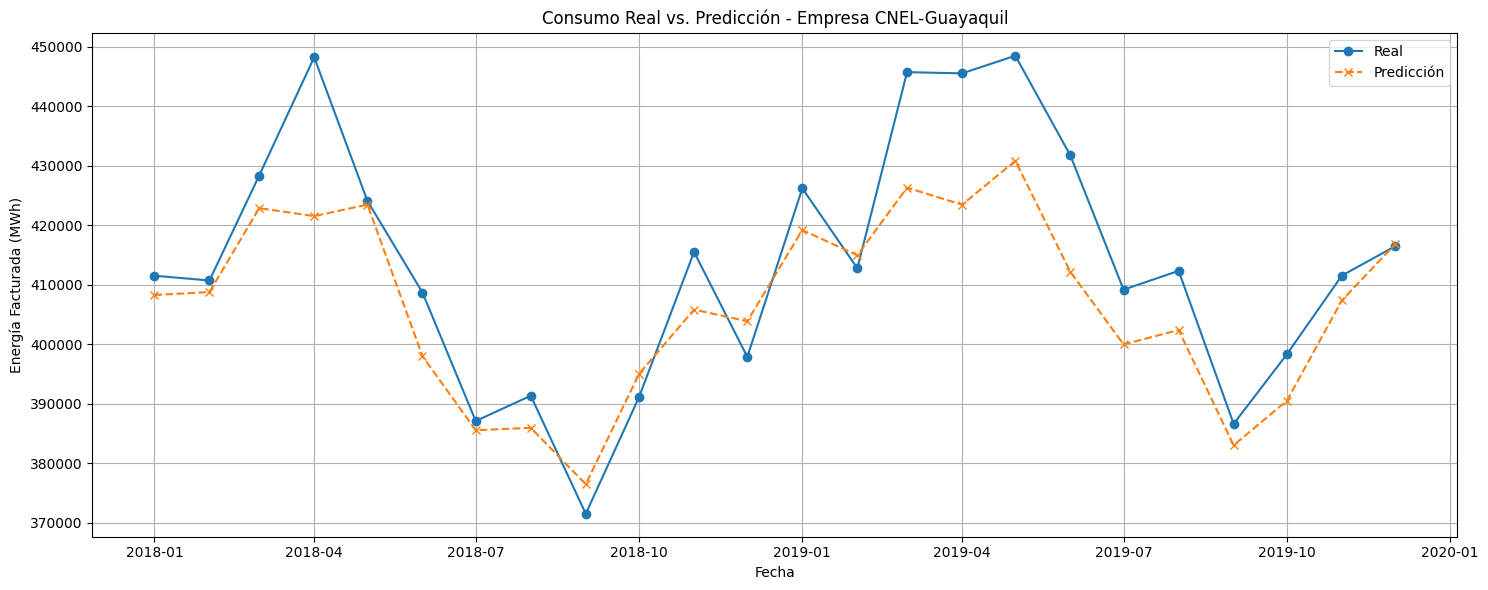

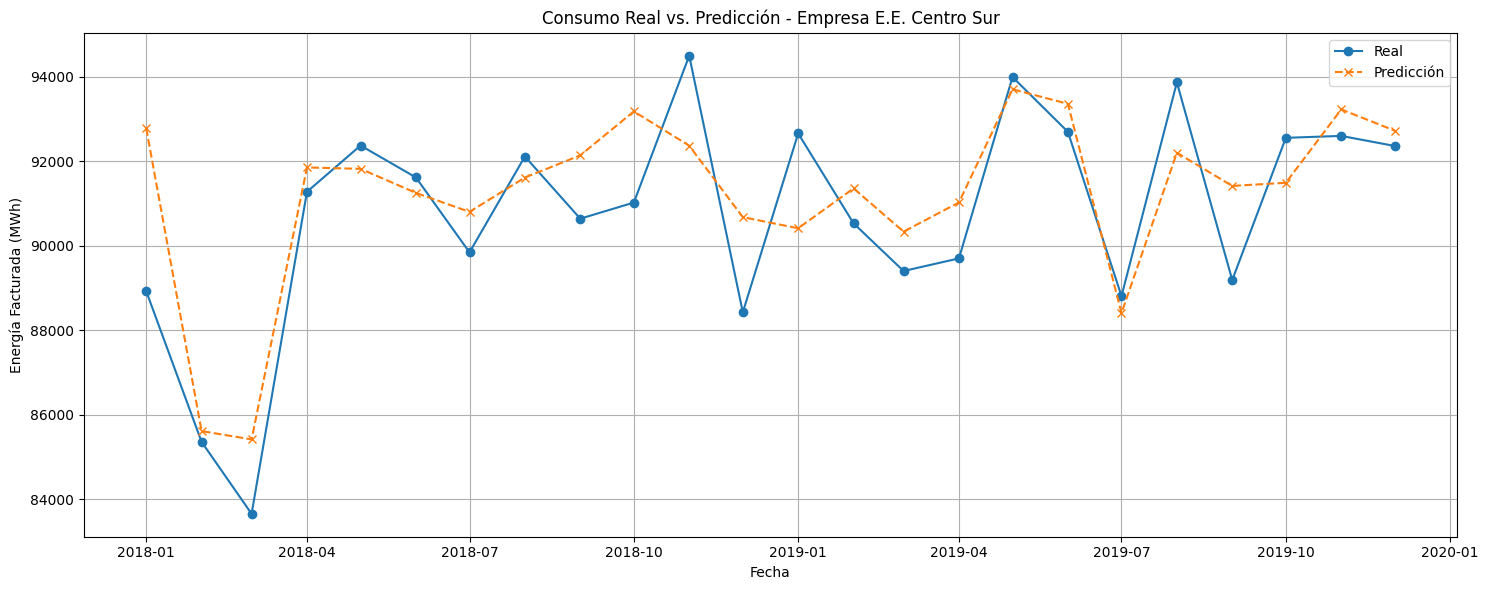

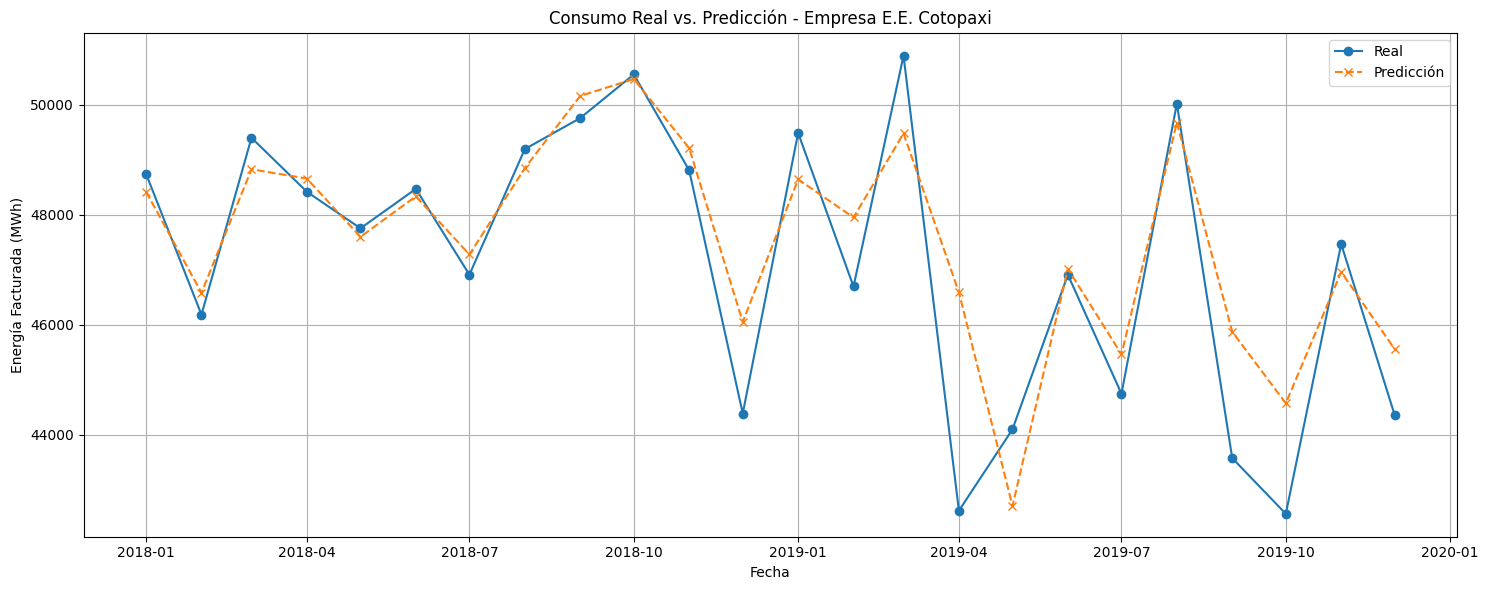

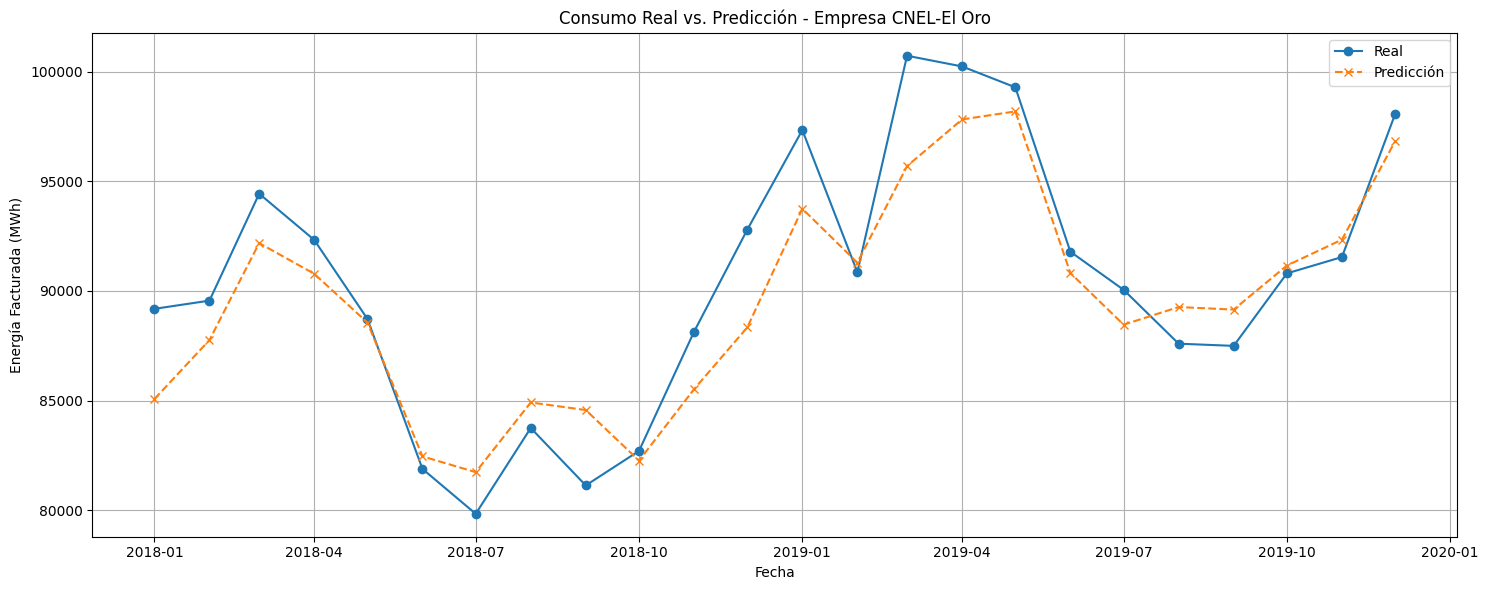

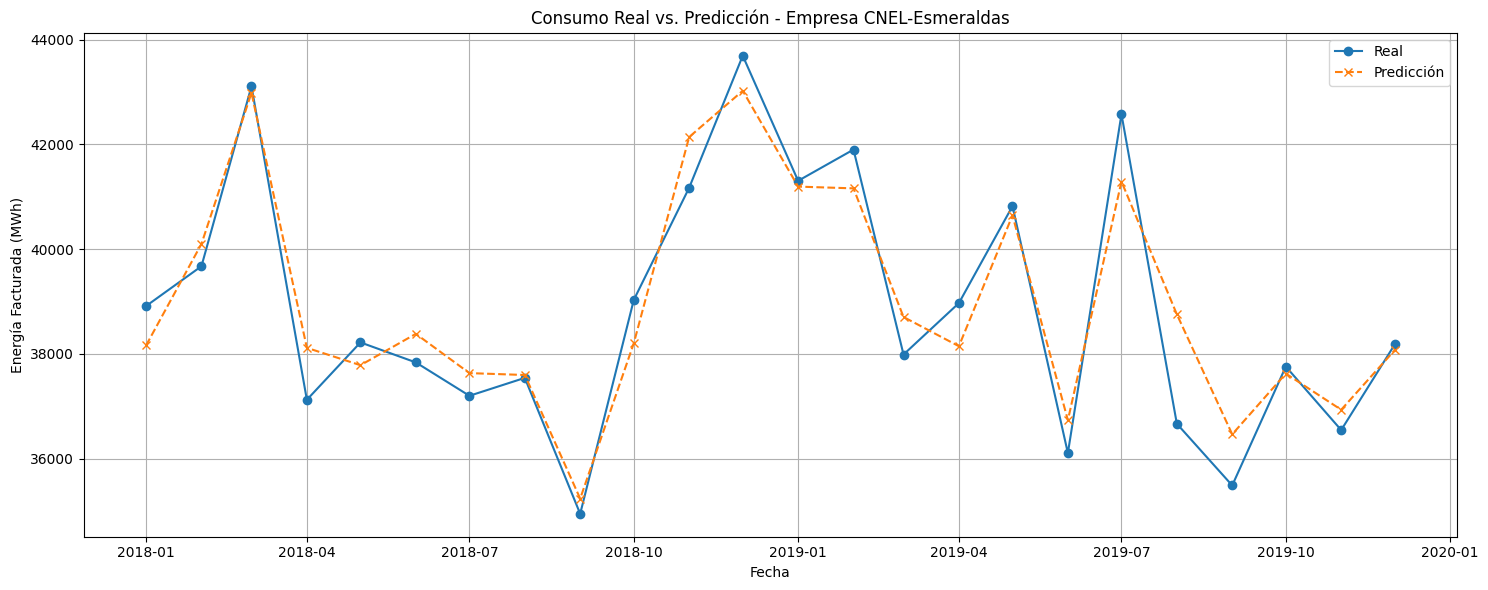

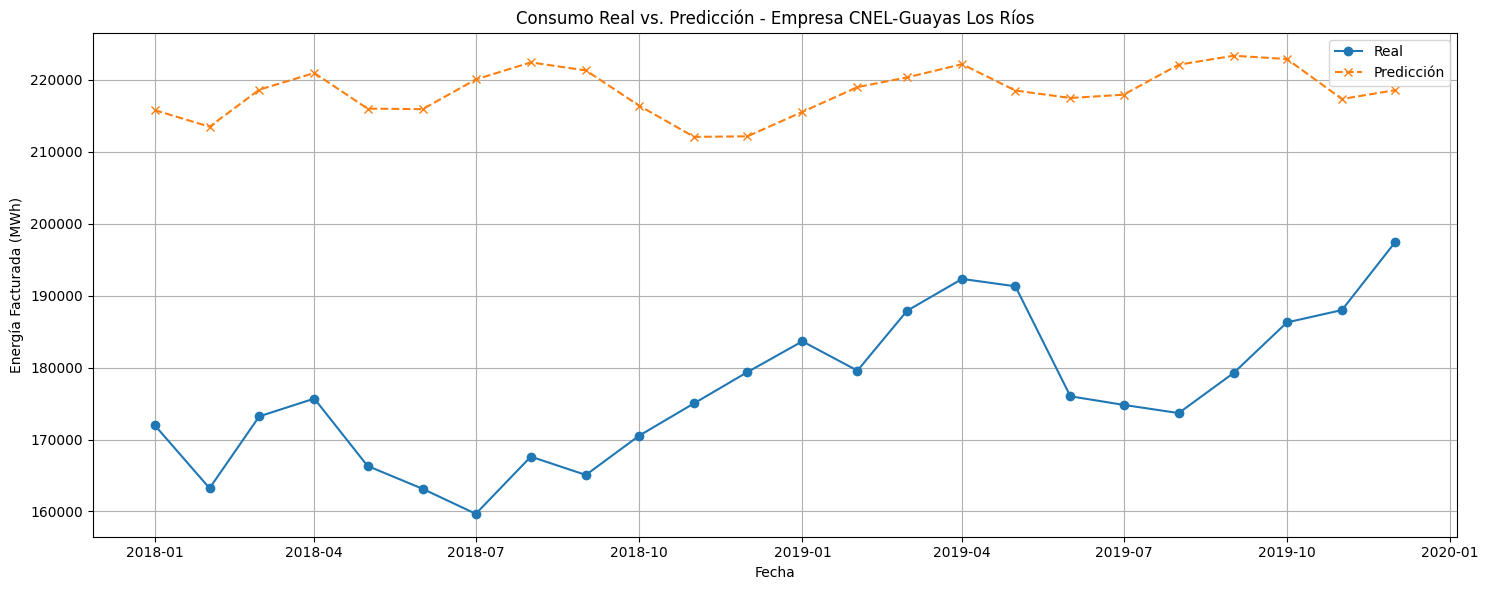

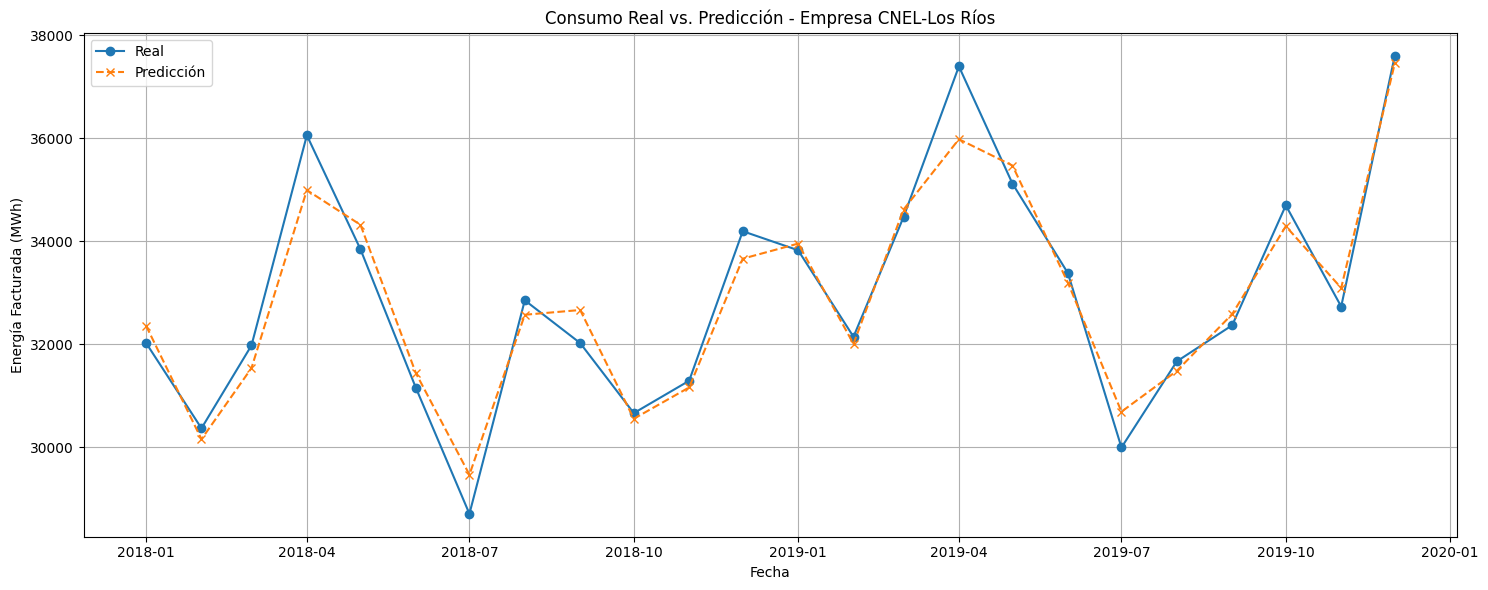

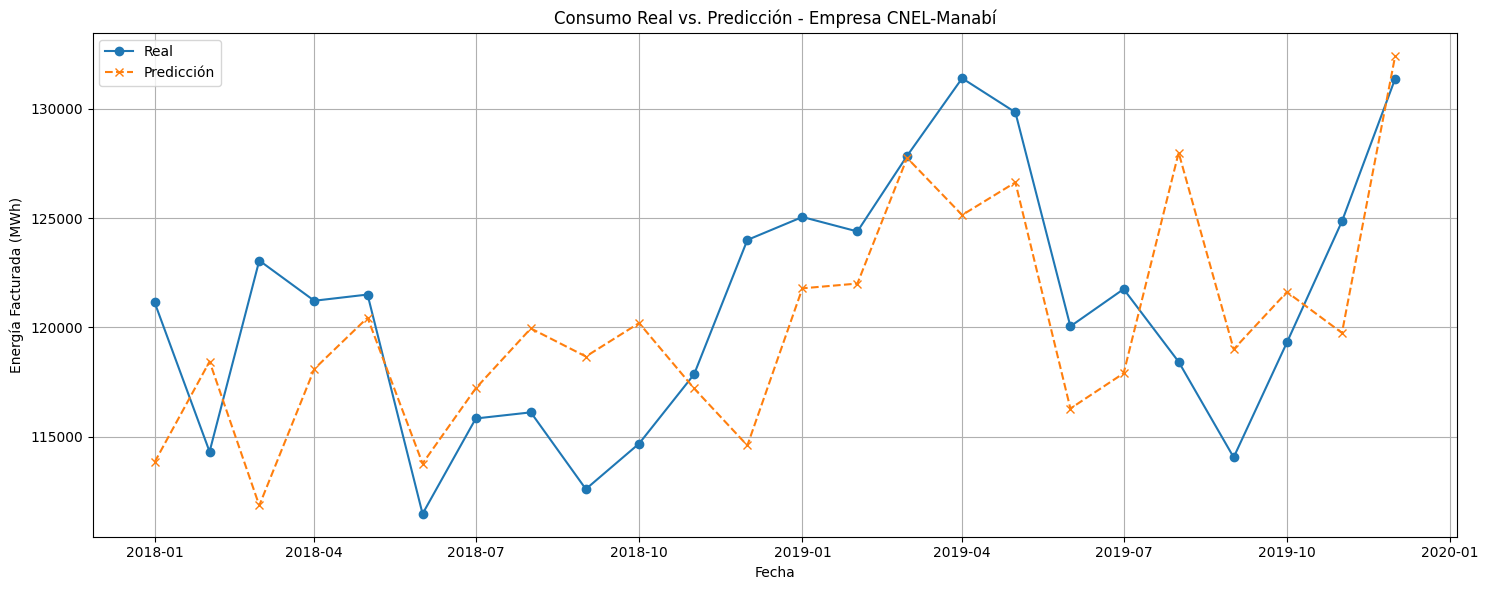

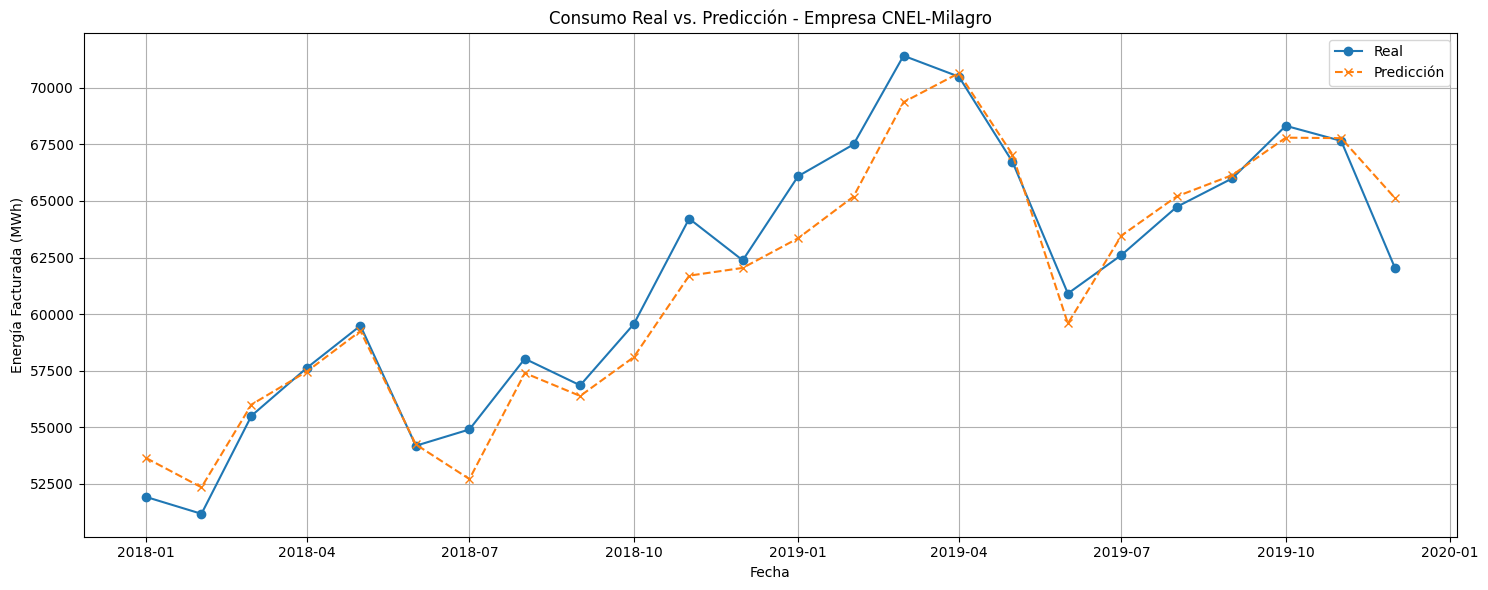

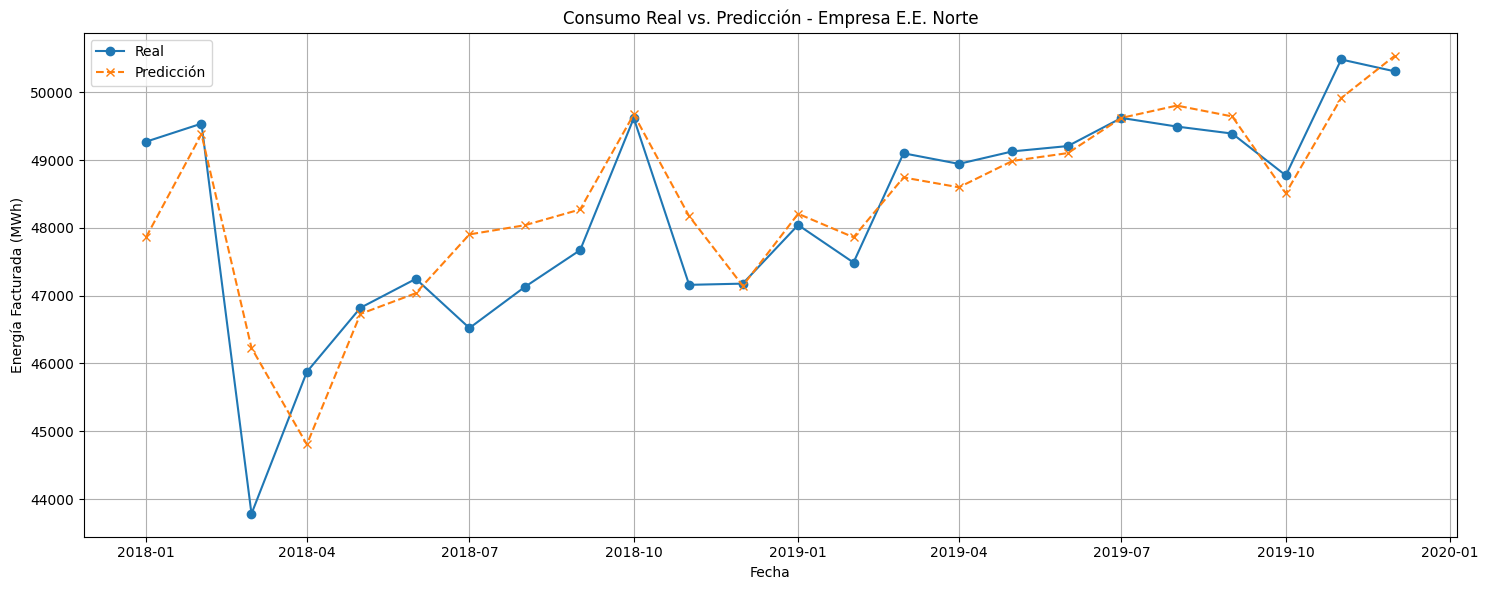

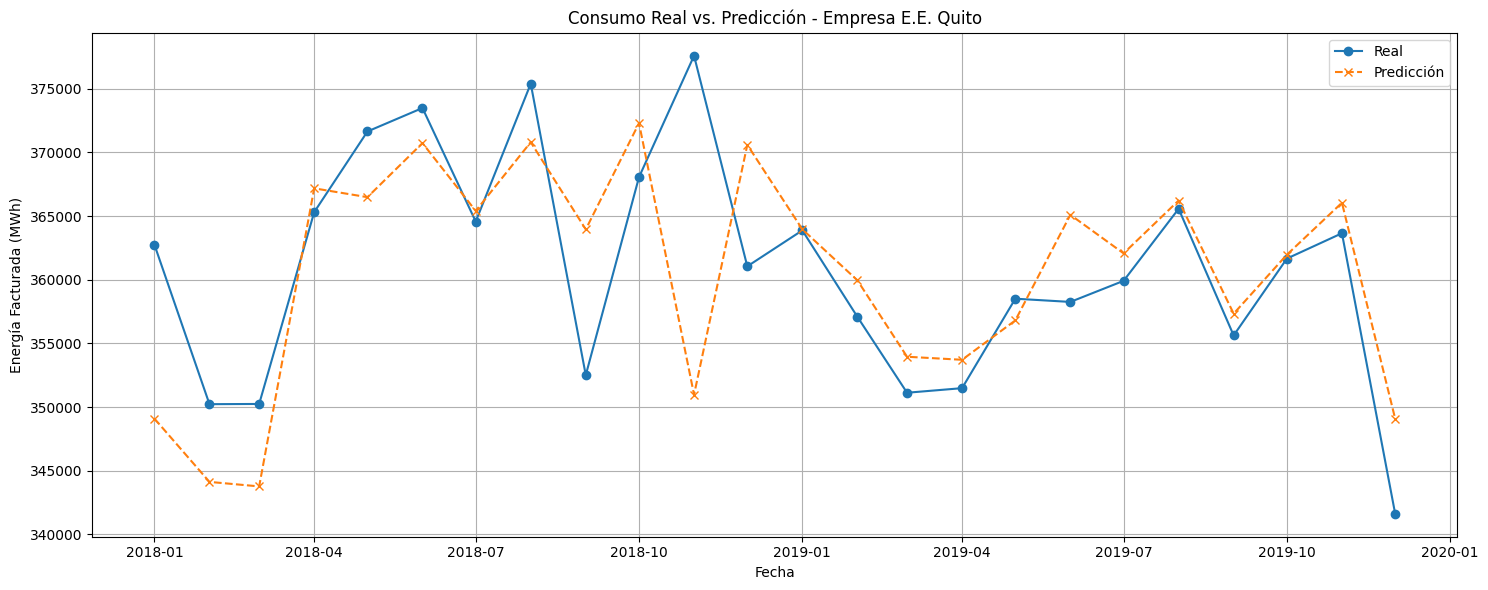

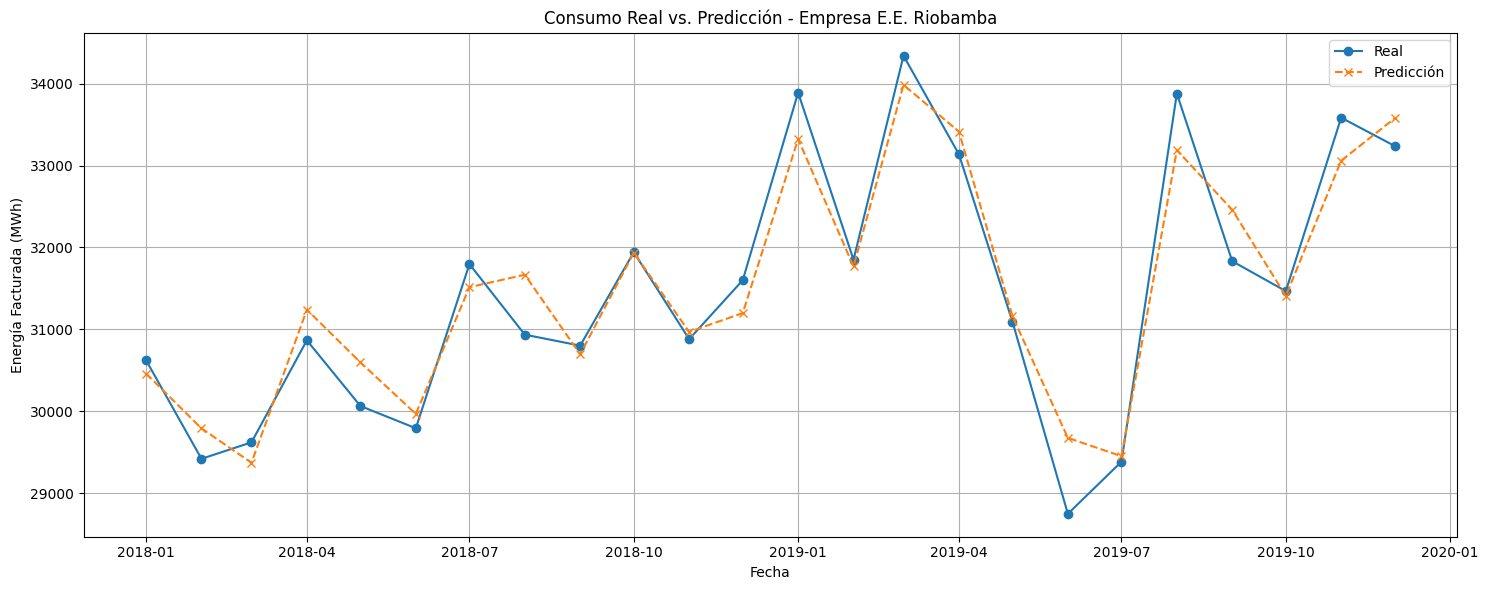

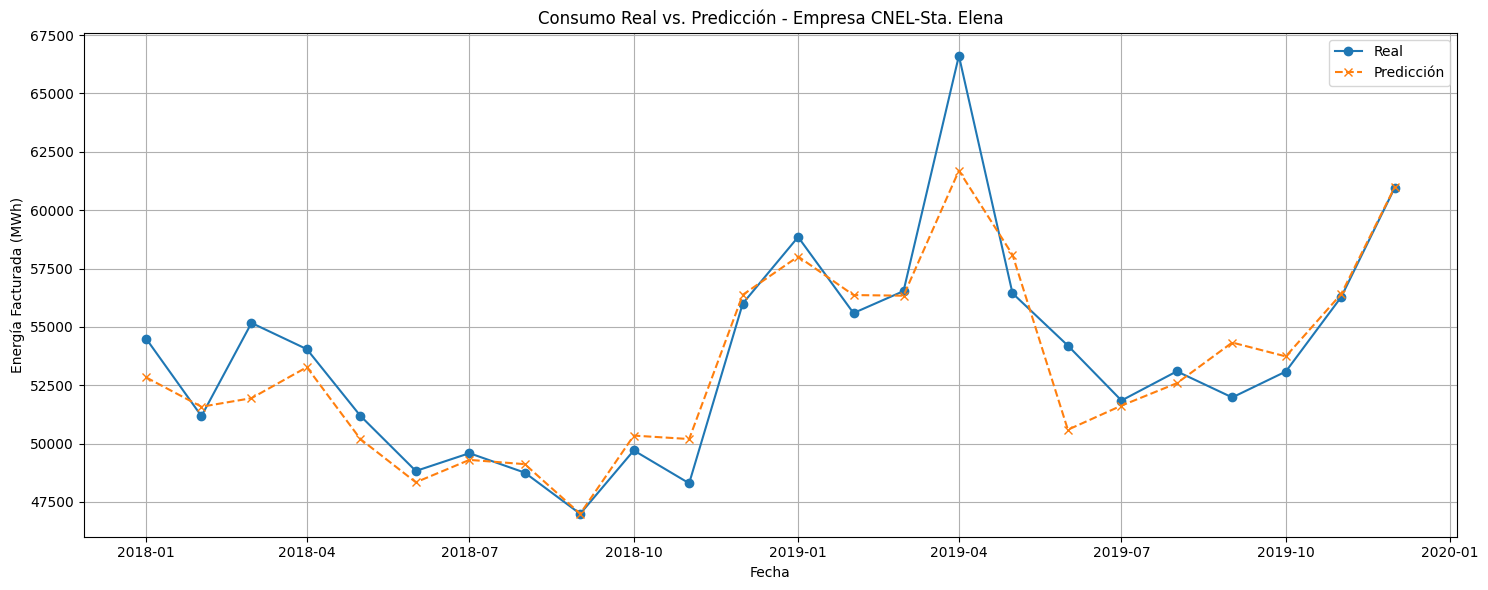

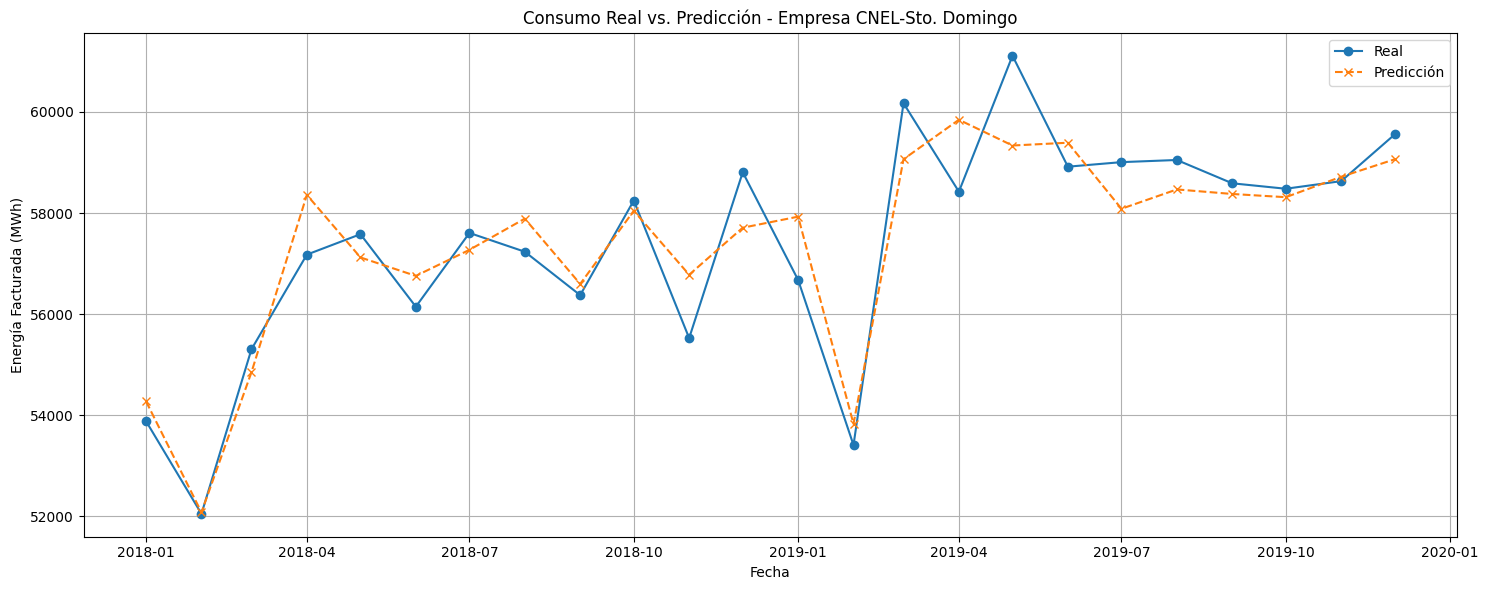

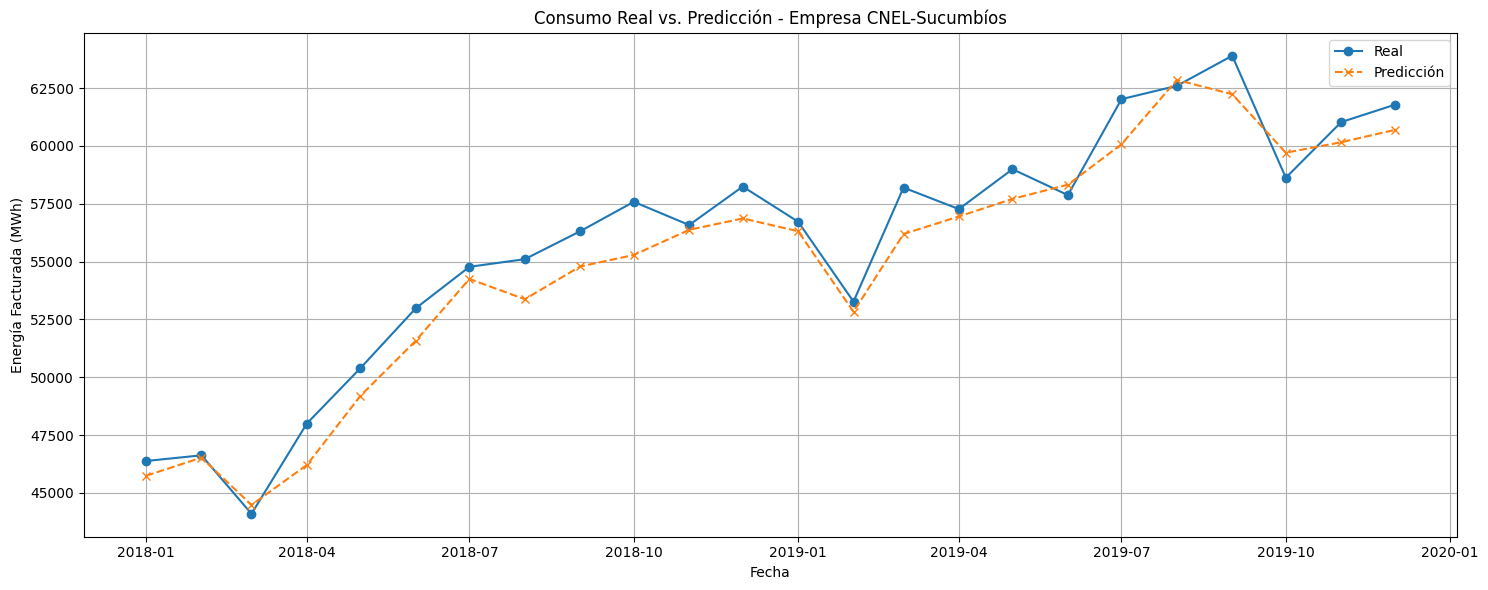

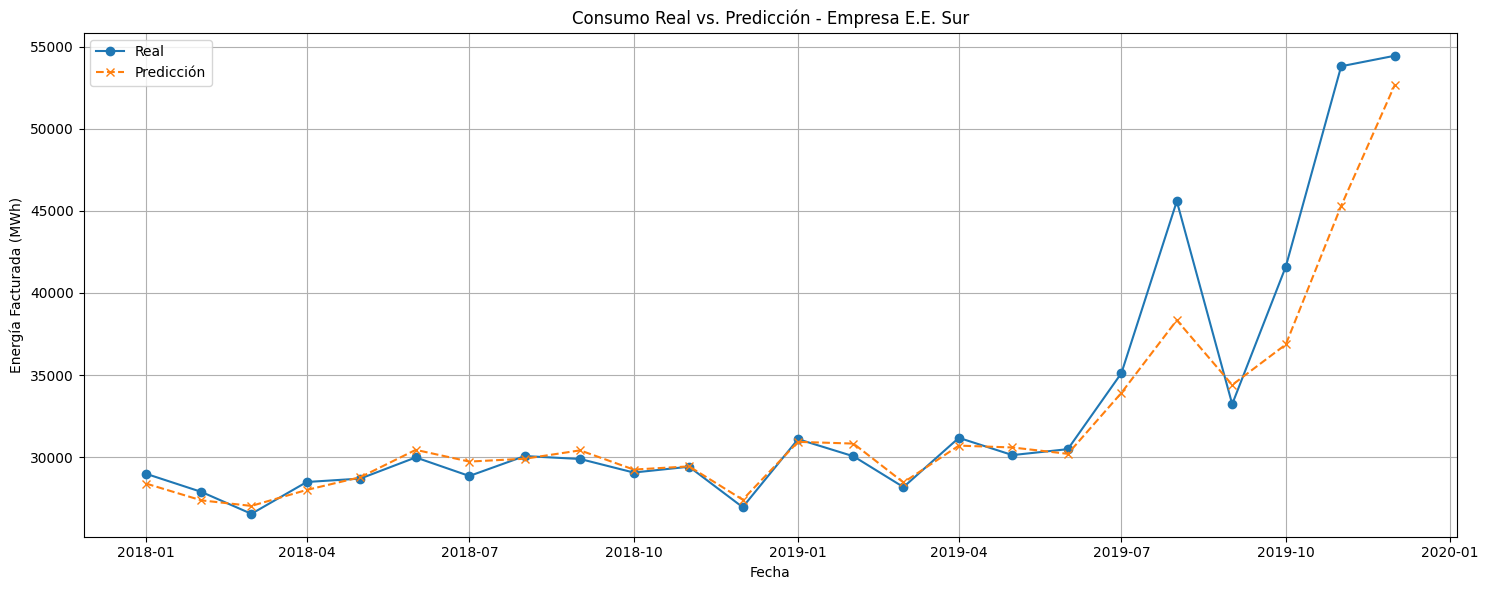


=== MÉTRICAS DETALLADAS POR EMPRESA (Ordenado por MAPE) ===
                  NombreEmpresa  MAE (MWh)  MAPE (%)     R2
IdEmpresa                                                  
11                  E.E. Ambato     568.09      1.02   0.67
178               E.E. Riobamba     335.85      1.06   0.93
142                  E.E. Norte     519.98      1.09   0.75
191           CNEL-Sto. Domingo     658.89      1.14   0.86
130               CNEL-Los Ríos     401.52      1.21   0.95
20                 CNEL-Bolívar      98.56      1.33   0.28
30              E.E. Centro Sur    1227.67      1.34   0.65
174                  E.E. Quito    5189.15      1.45   0.21
72              CNEL-Esmeraldas     612.22      1.57   0.90
136                CNEL-Milagro    1063.65      1.75   0.94
35                E.E. Cotopaxi     881.79      1.89   0.75
192              CNEL-Sucumbíos    1041.46      1.90   0.95
26               CNEL-Guayaquil    8459.26      2.05   0.71
189             CNEL-Sta. Elena    1123

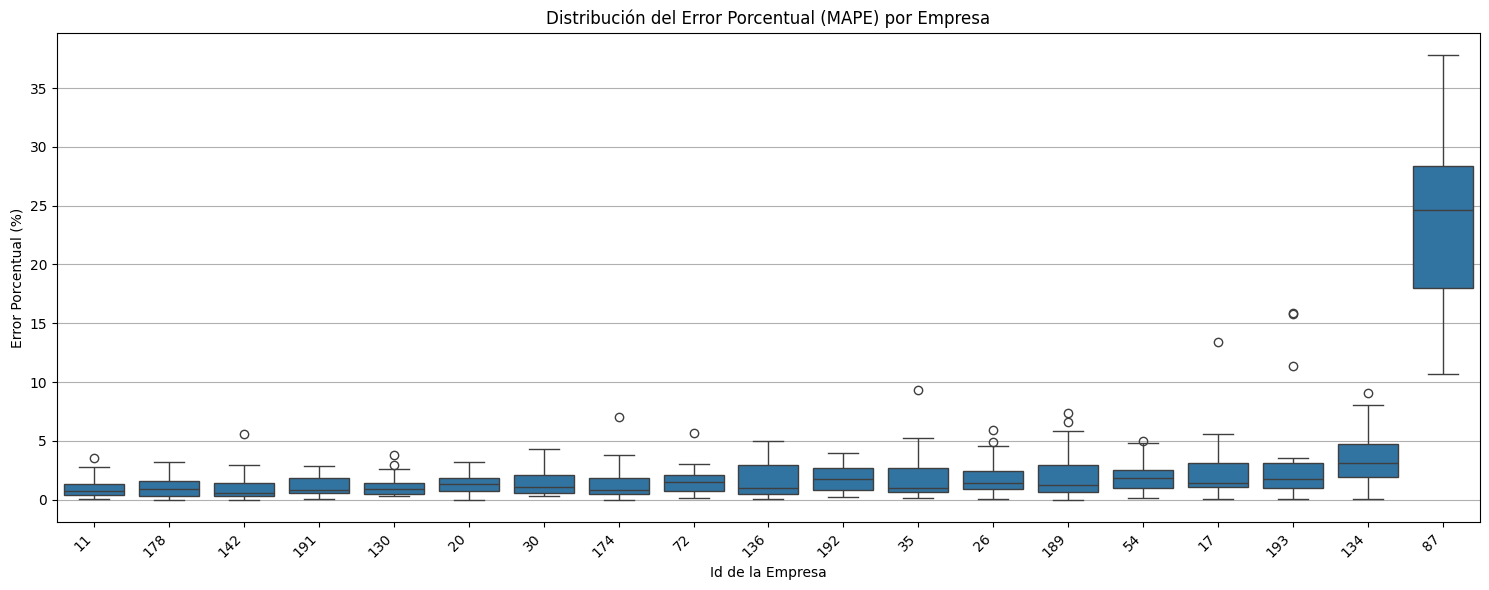

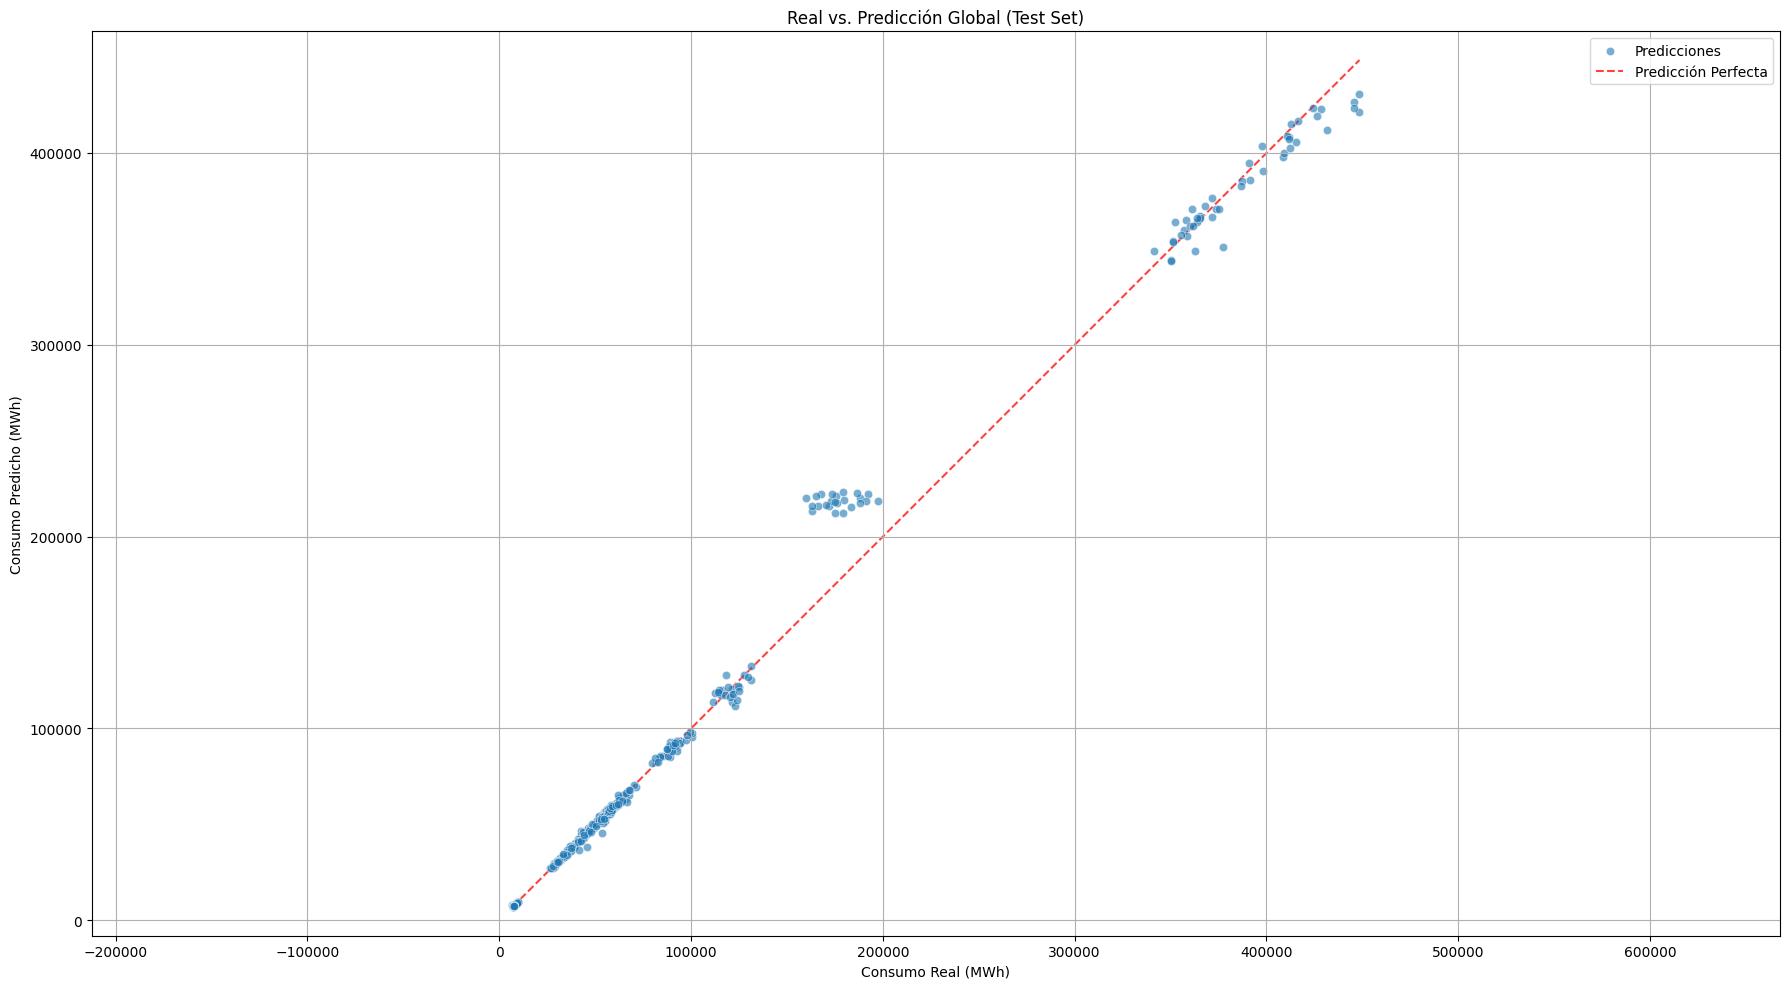

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Se añade la importación para RMSLE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import xgboost as xgb
import warnings
import json
import joblib

warnings.filterwarnings('ignore')

class EnergyConsumptionPredictor:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.company_encoder = LabelEncoder()
        self.feature_importance = None
        self.feature_cols = None

    def create_lag_features(self, df, target_col, lags):
        df_lag = df.copy()
        for lag in lags:
            df_lag[f'{target_col}_lag_{lag}'] = df_lag.groupby('IdEmpresa')[target_col].shift(lag)
        return df_lag

    def create_rolling_features(self, df, target_col, windows):
        df_roll = df.copy()
        for window in windows:
            # Media móvil
            df_roll[f'{target_col}_rolling_mean_{window}'] = df_roll.groupby('IdEmpresa')[target_col].transform(
                lambda x: x.rolling(window=window, min_periods=1).mean()
            )
            # Desviación estándar móvil
            df_roll[f'{target_col}_rolling_std_{window}'] = df_roll.groupby('IdEmpresa')[target_col].transform(
                lambda x: x.rolling(window=window, min_periods=1).std()
            )
            # Tendencia (pendiente de regresión lineal en ventana móvil)
            df_roll[f'{target_col}_rolling_trend_{window}'] = df_roll.groupby('IdEmpresa')[target_col].transform(
                lambda x: x.rolling(window=window, min_periods=2).apply(
                    lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) > 1 else 0
                )
            )
        return df_roll

    def create_seasonal_features(self, df):
        """Componentes estacionales trigonométricas"""
        df_seasonal = df.copy()
        # Componentes mensuales
        df_seasonal['mes_sin'] = np.sin(2 * np.pi * df_seasonal['IdMes'] / 12)
        df_seasonal['mes_cos'] = np.cos(2 * np.pi * df_seasonal['IdMes'] / 12)
        # Componentes trimestrales
        df_seasonal['trimestre_sin'] = np.sin(2 * np.pi * ((df_seasonal['IdMes'] - 1) // 3 + 1) / 4)
        df_seasonal['trimestre_cos'] = np.cos(2 * np.pi * ((df_seasonal['IdMes'] - 1) // 3 + 1) / 4)
        # Componentes semestrales
        df_seasonal['semestre_sin'] = np.sin(2 * np.pi * ((df_seasonal['IdMes'] - 1) // 6 + 1) / 2)
        df_seasonal['semestre_cos'] = np.cos(2 * np.pi * ((df_seasonal['IdMes'] - 1) // 6 + 1) / 2)
        return df_seasonal

    def feature_engineering(self, df):
        """Aplicar todo el feature engineering"""
        print("Iniciando Feature Engineering...")
        # Asegurar orden temporal
        df = df.sort_values(['IdEmpresa', 'Año', 'IdMes']).reset_index(drop=True)
        # 1. Lag features hasta 12 meses
        print("Creando lag features...")
        lag_periods = [1, 2, 3, 6, 12]
        df = self.create_lag_features(df, 'Energía Facturada (MWh)', lag_periods)
        # 2. Rolling statistics
        print("Creando rolling features...")
        rolling_windows = [3, 6, 12]
        df = self.create_rolling_features(df, 'Energía Facturada (MWh)', rolling_windows)
        # 3. Componentes estacionales
        print("Creando features estacionales...")
        df = self.create_seasonal_features(df)
        # 4. Features temporales adicionales
        df['año_mes'] = df['Año'] * 100 + df['IdMes']
        df['tendencia_temporal'] = (df['Año'] - df['Año'].min()) * 12 + df['IdMes']
        print(f"Feature Engineering completado. Total features: {df.shape[1]}")
        return df

    def prepare_data(self, df):
        """Preparar datos para el modelo"""
        df_processed = self.feature_engineering(df)
        df_processed = df_processed.dropna(subset=['Energía Facturada (MWh)'])
        exclude_cols = ['IdEmpresa', 'Energía Facturada (MWh)']
        self.feature_cols = [col for col in df_processed.columns if col not in exclude_cols]
        X = df_processed[self.feature_cols]
        y = df_processed['Energía Facturada (MWh)']
        companies = df_processed['IdEmpresa']
        years = df_processed['Año']
        dates = pd.to_datetime(df_processed['Año'].astype(str) + '-' + df_processed['IdMes'].astype(str))
        X['date'] = dates
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(X.median(numeric_only=True))
        return X, y, companies, years

    def temporal_split_with_validation(self, X, y, companies, years, train_end_year, val_year):
        train_mask = years <= train_end_year
        val_mask = years == val_year
        test_mask = years > val_year
        X_train = X[train_mask].drop(columns=['date'])
        X_val = X[val_mask].drop(columns=['date'])
        X_test = X[test_mask].drop(columns=['date'])
        y_train = y[train_mask]
        y_val = y[val_mask]
        y_test = y[test_mask]
        companies_train = companies[train_mask]
        companies_val = companies[val_mask]
        companies_test = companies[test_mask]
        dates_test = X[test_mask]['date']
        return X_train, X_val, X_test, y_train, y_val, y_test, companies_train, companies_val, companies_test, dates_test

    def train_model(self, X_train, y_train, X_val, y_val):
        """Entrenar modelo XGBoost con early stopping"""
        print("Entrenando modelo XGBoost...")
        params = {
            'n_estimators': 1000,
            'learning_rate': 0.03,
            'max_depth': 6,
            'min_child_weight': 3,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'random_state': 42,
            'n_jobs': -1,
            'verbosity': 0,
            'early_stopping_rounds': 50,
        }
        self.model = xgb.XGBRegressor(**params)
        eval_set = [(X_train, y_train), (X_val, y_val)]
        self.model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=False
        )

        self.feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        print("Entrenamiento completado.")

    def evaluate_model(self, X_test, y_test, companies_test, dates_test):
        """Evaluar modelo y retornar dataframe con predicciones"""
        y_pred = self.model.predict(X_test)

        # --- INICIO DE LA MODIFICACIÓN ---
        # Asegurar que las predicciones no sean negativas para el cálculo de RMSLE
        y_pred_rmsle = np.maximum(y_pred, 0)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        # Calcular RMSLE
        rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_rmsle))
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        print("=== MÉTRICAS GENERALES (TEST SET) ===")
        print(f"MAE: {mae:.2f} MWh")
        print(f"RMSE: {rmse:.2f} MWh")
        print(f"R²: {r2:.4f}")
        print(f"MAPE: {mape:.2f}%")
        # Imprimir RMSLE
        print(f"RMSLE: {rmsle:.4f}")
        # --- FIN DE LA MODIFICACIÓN ---

        results_df = pd.DataFrame({
            'IdEmpresa': companies_test,
            'date': dates_test,
            'y_true': y_test,
            'y_pred': y_pred,
            'error_abs': np.abs(y_test - y_pred),
            'error_rel': np.abs((y_test - y_pred) / y_test) * 100
        })

        result = {"mae": mae, "rmse": rmse, "r2": r2, "mape": mape, "rmsle": rmsle}

        with open('/content/matricas_modelo.json', 'w') as f:
            json.dump(result, f, indent=4)

        return results_df

    def calculate_metrics_by_company(self, results_df):
        print("\n=== MÉTRICAS DETALLADAS POR EMPRESA (Ordenado por MAPE) ===")
        metrics_list = []
        for company in results_df['IdEmpresa'].unique():
            company_df = results_df[results_df['IdEmpresa'] == company]
            y_true_company = company_df['y_true']
            y_pred_company = company_df['y_pred']
            if len(y_true_company) == 0: continue
            company_metrics = {
                'IdEmpresa': company,
                'NombreEmpresa': company_df['NombreEmpresa'].iloc[0],
                'MAE (MWh)': mean_absolute_error(y_true_company, y_pred_company),
                'MAPE (%)': np.mean(np.abs((y_true_company - y_pred_company) / np.where(y_true_company == 0, 1, y_pred_company))) * 100,
                'R2': r2_score(y_true_company, y_pred_company),
            }
            metrics_list.append(company_metrics)
        metrics_df = pd.DataFrame(metrics_list).sort_values(by='MAPE (%)', ascending=True)
        metrics_df = metrics_df.set_index('IdEmpresa')
        pd.options.display.float_format = '{:.2f}'.format
        metrics_df.to_csv('metrics_by_company.csv')
        print(metrics_df)

    def plot_predictions_by_company(self, results_df):
        """Graficar real vs. predicho para cada empresa"""
        companies = results_df['IdEmpresa'].unique()
        for company in companies:
            plt.figure(figsize=(15, 6))
            company_df = results_df[results_df['IdEmpresa'] == company]
            plt.plot(company_df['date'], company_df['y_true'], label='Real', marker='o')
            plt.plot(company_df['date'], company_df['y_pred'], label='Predicción', linestyle='--', marker='x')
            plt.title(f"Consumo Real vs. Predicción - Empresa {company_df['NombreEmpresa'].iloc[0]}")
            plt.xlabel('Fecha')
            plt.ylabel('Energía Facturada (MWh)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        # Se ha comentado el guardado para que se muestre en pantalla
        # print(f"Gráficos de predicción por empresa guardados como 'prediccion_empresa_*.png'")

    def plot_error_distribution(self, results_df):
        """Graficar la distribución del error porcentual por empresa"""
        plt.figure(figsize=(15, 6))
        sorted_companies = results_df.groupby('IdEmpresa')['error_rel'].mean().sort_values().index
        sns.boxplot(data=results_df, x='IdEmpresa', y='error_rel', order=sorted_companies)
        plt.title('Distribución del Error Porcentual (MAPE) por Empresa')
        plt.xlabel('Id de la Empresa')
        plt.ylabel('Error Porcentual (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()
        # print("Gráfico de distribución de error guardado como 'distribucion_error_boxplot.png'")

    # --- INICIO DE LA NUEVA FUNCIÓN ---
    def plot_global_actual_vs_predicted_scatter(self, results_df):
        """Crea un gráfico de dispersión global de valores reales vs. predichos."""
        plt.figure(figsize=(18, 10))

        # Crear el scatter plot
        sns.scatterplot(x='y_true', y='y_pred', data=results_df, alpha=0.6, label='Predicciones')


        # Crear la línea de referencia (y=x para predicción perfecta)
        lims = [
            np.min([results_df['y_true'].min(), results_df['y_pred'].min()]),
            np.max([results_df['y_true'].max(), results_df['y_pred'].max()]),
        ]
        plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Predicción Perfecta')

        plt.title('Real vs. Predicción Global (Test Set)')
        plt.xlabel('Consumo Real (MWh)')
        plt.ylabel('Consumo Predicho (MWh)')
        plt.legend()
        plt.grid(True)
        # Forzar ejes iguales para una correcta visualización de la línea y=x
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
    def save_model(self, filepath='energy_predictor_model.joblib'):
        """Guarda el modelo entrenado y la lista de features en un archivo."""
        print(f"Guardando modelo en {filepath}...")
        model_data = {
            'model': self.model,
            'feature_cols': self.feature_cols
        }
        joblib.dump(model_data, filepath)
        print("Modelo guardado exitosamente.")

    # --- FIN DE LA NUEVA FUNCIÓN ---

# Función principal para ejecutar el pipeline completo
def run_energy_prediction_pipeline(df):
    predictor = EnergyConsumptionPredictor()
    X, y, companies, years = predictor.prepare_data(df)

    X_train, X_val, X_test, y_train, y_val, y_test, \
    companies_train, companies_val, companies_test, dates_test = \
        predictor.temporal_split_with_validation(X, y, companies, years, train_end_year=2016, val_year=2017)

    predictor.train_model(X_train, y_train, X_val, y_val)
    results_df = predictor.evaluate_model(X_test, y_test, companies_test, dates_test)
    nombres_empresa = {
  11: "E.E. Ambato",
  17: "E.E. Azogues",
  20: "CNEL-Bolívar",
  26: "CNEL-Guayaquil",
  30: "E.E. Centro Sur",
  35: "E.E. Cotopaxi",
  54: "CNEL-El Oro",
  72: "CNEL-Esmeraldas",
  81: "E.E. Galápagos",
  87: "CNEL-Guayas Los Ríos",
  130: "CNEL-Los Ríos",
  134: "CNEL-Manabí",
  136: "CNEL-Milagro",
  142: "E.E. Norte",
  174: "E.E. Quito",
  178: "E.E. Riobamba",
  189: "CNEL-Sta. Elena",
  191: "CNEL-Sto. Domingo",
  192: "CNEL-Sucumbíos",
  193: "E.E. Sur"
}
    #consumo_empresa = df.copy()

    results_df['NombreEmpresa'] = results_df['IdEmpresa'].map(nombres_empresa)
    results_df.to_csv('resultado_modelo.csv', index=False)

    predictor.save_model()

    # Generar gráficos
    predictor.plot_predictions_by_company(results_df)
    predictor.calculate_metrics_by_company(results_df)
    predictor.plot_error_distribution(results_df)

    # --- INICIO DE LA MODIFICACIÓN ---
    # Llamar a la nueva función del gráfico de dispersión
    predictor.plot_global_actual_vs_predicted_scatter(results_df)
    # --- FIN DE LA MODIFICACIÓN ---

    return predictor, results_df

# --- CÓDIGO DE EJEMPLO ---
# Se asume que 'df' es un DataFrame ya cargado con tus datos
# Si no, reemplaza 'df' con el nombre de tu DataFrame

# df = pd.read_csv('tus_datos.csv') # Ejemplo de carga de datos
predictor, results = run_energy_prediction_pipeline(df)

# print("\nPipeline completado exitosamente!")